# Problem Description

There are a large number of articles and their corresponding titles that have been downloaded from Wikipedia. But the problem is that the articles and their titles are jumbled up in a group of 10 articles. We are given 3 files named trainq.json, examdata1.json and testq.json. In the trainq.json, we are given the title_ids for each data point, the matching ans_id for the corresponding title. The title_ids are for the titles and the ans_ids are for the articles. The third column is the candidates column. These candidates are a group of 10 ans_ids which are the potential matches for a particular title. But here in the trainq.json, we already know the best match in the ans_id column. Now coming to the examdata1.json file, it has 2 columns, the first column stores all the title_ids and the ans_ids and the second column stores the respective title and article text. Finally, in the testq.json file, we have the title_ids and the candidates (list of len 10).

Task: Using machine learning, we need to sort the candidates in such a way that the first one would have the best match, the second would be the next best match and so on.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the training data
traindata= pd.read_json('train_q.json')

In [3]:
traindata.head()

,title_id,ans_id,candidates
0,title03431,doc23157,"[doc64538, doc57586, doc75237, doc13631, doc92..."
1,title07912,doc51188,"[doc66709, doc93219, doc87374, doc32414, doc21..."
2,title53725,doc35204,"[doc94418, doc55086, doc75014, doc95352, doc16..."
3,title69549,doc85483,"[doc85483, doc32874, doc74704, doc00154, doc15..."
4,title55601,doc37587,"[doc10059, doc06332, doc32805, doc72136, doc73..."


In [4]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14032 entries, 0 to 14031
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title_id    14032 non-null  object
 1   ans_id      14032 non-null  object
 2   candidates  14032 non-null  object
dtypes: object(3)
memory usage: 329.0+ KB


From the above we can see that there are no null values. This is a good thing as we no longer have to care about missing data.

In [5]:
# Reading the exam data
examdata= pd.read_json('exam_data1.json')

In [6]:
examdata.head()

,0,1
0,doc53153,She authored poetry and books in the Gullah l...
1,doc03756,He served as Minister for Defence in the Nkru...
2,doc41870,The film is about three Chinese men traveling...
3,doc55471,"sa. ""Sámi girkoráđđi"", l.sa. ""Sáme girkoráde"",..."
4,doc07508,It is usually broad-topped and made of excava...


In [7]:
examdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35080 entries, 0 to 35079
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       35080 non-null  object
 1   1       35080 non-null  object
dtypes: object(2)
memory usage: 548.2+ KB


Here as well, we don't have null values.

In [8]:
# Saving all the ans_id of training data to a list
trainans=list(traindata.ans_id)

In [9]:
# Exploding (expanding) the training data on the list of candidates
newtrain=traindata.explode('candidates')

In [10]:
newtrain

,title_id,ans_id,candidates
0,title03431,doc23157,doc64538
0,title03431,doc23157,doc57586
0,title03431,doc23157,doc75237
0,title03431,doc23157,doc13631
0,title03431,doc23157,doc92492
...,...,...,...
14031,title89394,doc48527,doc26116
14031,title89394,doc48527,doc48527
14031,title89394,doc48527,doc81169
14031,title89394,doc48527,doc99060


In [11]:
# Another way to create the ans_id feature as shown above would be like so:
'''
ogans=[[i]*10 for i in traindata['ans_id']]
allog=[]
for i in ogans:
    for j in i:
        allog.append(j)
len(allog)
'''
# Since the len of the candidates is 10, we are multiplying each ans_id with 10 so that the len of all features remains the same.

"\nogans=[[i]*10 for i in traindata['ans_id']]\nallog=[]\nfor i in ogans:\n    for j in i:\n        allog.append(j)\nlen(allog)\n"

In [12]:
# Creating a label of 1 if the ans_id and the best candidate matches, else put a 0.
label= []
for ans,cand in newtrain[['ans_id','candidates']].iterrows():
    if cand[0]==cand[1]:
        label.append(1)
    else:
        label.append(0)

In [13]:
# Creating a feature in the dataset
newtrain['label']=label

In [14]:
# Dropping ans_id since we have stored the necessary information in the label column.
newtrain.drop('ans_id', axis=1, inplace=True)

In [15]:
# renaming the candidates column since they are the IDs of the articles and not candidates.
newtrain.rename(columns={'candidates':'ans_id'}, inplace=True)

In [16]:
examdata[0].value_counts()

title40425    1
title62312    1
title52317    1
doc95298      1
doc03942      1
             ..
title16187    1
doc43741      1
title00535    1
doc61965      1
title66024    1
Name: 0, Length: 35080, dtype: int64

From the above we can see that there are IDs present both for the documents as well as the titles. We will use this to map all the text of the respective IDs.

In [17]:
# Joining the training data and examdata on ans_id so that we can associate the text with the respective ans_ids.
newtrain=newtrain.join(examdata.set_index(0), on='ans_id')

In [18]:
newtrain

,title_id,ans_id,label,1
0,title03431,doc64538,0,"R. R. Tolkien's fantasy novel, ""The Lord of t..."
0,title03431,doc57586,0,"The author of few lyrical works, he was forem..."
0,title03431,doc75237,0,Zaynab delivered a defiant sermon in the cour...
0,title03431,doc13631,0,1400 – 1485) was secretary to Richard III of ...
0,title03431,doc92492,0,"Jayanegara was the heir, crown prince, the so..."
...,...,...,...,...
14031,title89394,doc26116,0,"Keith, known as Bill Keith (born August 19, 1..."
14031,title89394,doc48527,1,He was elected in the 2015 federal election a...
14031,title89394,doc81169,0,"A former journalist, Chan was a political ass..."
14031,title89394,doc99060,0,He has served since 2003 except for the term ...


In [19]:
# Renaming the new column
newtrain.rename(columns={1:'ansdoc'}, inplace=True)

In [20]:
# Joining the training data and examdata on title_id so that we can associate the text with the respective title_ids.
newtrain=newtrain.join(examdata.set_index(0), on='title_id')

In [21]:
# Renaming the new column
newtrain.rename(columns={1:'tidoc'}, inplace=True)

In [22]:
newtrain.head(5)

,title_id,ans_id,label,ansdoc,tidoc
0,title03431,doc64538,0,"R. R. Tolkien's fantasy novel, ""The Lord of t...",Bhurishravas
0,title03431,doc57586,0,"The author of few lyrical works, he was forem...",Bhurishravas
0,title03431,doc75237,0,Zaynab delivered a defiant sermon in the cour...,Bhurishravas
0,title03431,doc13631,0,1400 – 1485) was secretary to Richard III of ...,Bhurishravas
0,title03431,doc92492,0,"Jayanegara was the heir, crown prince, the so...",Bhurishravas


In [23]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140320 entries, 0 to 14031
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title_id  140320 non-null  object
 1   ans_id    140320 non-null  object
 2   label     140320 non-null  int64 
 3   ansdoc    140320 non-null  object
 4   tidoc     140320 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.4+ MB


<AxesSubplot:xlabel='label'>

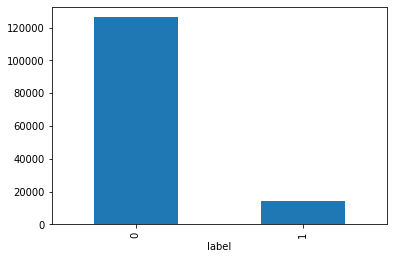

In [24]:
# Checking for number of similar and different title and article pairs
newtrain.groupby('label')['title_id'].count().plot.bar()

From the above we can see that our dataset is heavily imbalanced. While dis-similar title-article pairs make up for more than 90% of data, we only have very few examples of similar title-article pairs. This analysis is very crucial as it hints us on how to prepare and evaluate the actual machine learning model. Since the dataset is heavily imbalanced, we can either choose to artificially balance the dataset by generating more synthetic points, or, build a machine learning model that is less impacted by imbalanced datasets. Also, we can't use evaluation metrics such as accuracy. Since the dataset is imbalanced, we will get a high accuracy regardless of model performance. Rather, we will choose methods such as precision, recall and f-1 score.

In [25]:
# Checking for number of unique title_ids
all_titles= newtrain.title_id.to_list()
uniq_titles= len(np.unique(all_titles))
print(uniq_titles)

14032


From the above, we can see that all the title_ids are unique since the shape of newtrain is (140320,4) and each title is multiplied by 10 (due to df.explode)

In [26]:
# Checking for duplicate pairs of title_id and ans_id
pair_dup= newtrain[['title_id','ans_id','label']].groupby(['title_id','ans_id']).count().reset_index()
num_dup= newtrain.shape[0]-pair_dup.shape[0]
print('Number of duplicate pairs: ', num_dup)

Number of duplicate pairs:  0


In [27]:
# Creating a new feature called freq_tit which is the frequency of occurance of each title_id. But since we exploded the data before, almost all of them would be equal to 10.
newtrain['freq_tit'] = newtrain.groupby('title_id')['title_id'].transform('count')

In [28]:
# Creating a new feature called freq_art which is the frequency of occurance of each ans_id.
newtrain['freq_art'] = newtrain.groupby('ans_id')['ans_id'].transform('count')

In [29]:
# the feature artlen is first selecting the ansdoc feature in newtrain and then applying str function to convert all the values in the ansdoc column into string and then applying the len function to get the length of each article (ansdoc)
newtrain['artlen'] = newtrain['ansdoc'].str.len() 

In [30]:
# Just like above, here we are getting the lengths of each title  by applying the same method on te tidoc column.
newtrain['titlen'] = newtrain['tidoc'].str.len()

In [31]:
# Here we are counting the number of words in each article and making it a feature
newtrain['art_n_words'] = newtrain['ansdoc'].apply(lambda row: len(row.split(" ")))

In [32]:
# We are doing the same here as above, we are counting the number of words in the title and making it a feature.
newtrain['tit_n_words'] = newtrain['tidoc'].apply(lambda row: len(row.split(" ")))

In [33]:
# Here we are checking the number of common unique words between the title and the article.
def norm_w_common(row):
    # for w1, we are first taking each row of the article (ansdoc) and splitting the text using the spaces to get each word, then, using the map function, we are applying the lambda function, which first converts each word to lowercase and then strips any space. Finally, we are taking a set, meaning, we are only taking the unique words in the text and discarding any repeated words. The same procedure is done for the title text.
    w1 = set(map(lambda word: word.lower().strip(), row['ansdoc'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['tidoc'].split(" "))) 
    # if the words w1 and w2 both are present, then we are returning the length of such common words.
    return 1.0 * len(w1 & w2)
newtrain['word_Common'] = newtrain.apply(norm_w_common, axis=1)

In [34]:
# Here we are simply counting the number of words in the article and the title and then adding them both.
def norm_w_total(row):
    # Just like before, we are first taking each row of the article and splitting the text by spaces, converting each word to lowercase, stripping all the spaces and making a set of unique words. Same is done for the title text.
    w1 = set(map(lambda word: word.lower().strip(), row['ansdoc'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['tidoc'].split(" ")))
    # as we can see, we are adding the lengths of both sets.
    return 1.0 * (len(w1) + len(w2))
newtrain['word_Total'] = newtrain.apply(norm_w_total, axis=1)

In [35]:
# this is an interesting feature, here we are dividing the length of common words with the length of total words. This gives us the knowledge of by how much value do the 2 texts are similar. Since the title text will have less words naturally, we will get very small values here. But nonetheless, this feature must hold some importance.
def norm_w_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['ansdoc'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['tidoc'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
newtrain['word_share'] = newtrain.apply(norm_w_share, axis=1)

In [36]:
# we are adding the frequency of both title_id and the ans_id as a feature.
newtrain['freq_tit+art'] = newtrain['freq_tit']+newtrain['freq_art']
newtrain['freq_tit-art'] = abs(newtrain['freq_tit']-newtrain['freq_art'])

In [37]:
newtrain

,title_id,ans_id,label,ansdoc,tidoc,freq_tit,freq_art,artlen,titlen,art_n_words,tit_n_words,word_Common,word_Total,word_share,freq_tit+art,freq_tit-art
0,title03431,doc64538,0,"R. R. Tolkien's fantasy novel, ""The Lord of t...",Bhurishravas,10,22,9230,12,1567,1,0.0,675.0,0.000000,32,12
0,title03431,doc57586,0,"The author of few lyrical works, he was forem...",Bhurishravas,10,22,9194,12,1425,1,0.0,745.0,0.000000,32,12
0,title03431,doc75237,0,Zaynab delivered a defiant sermon in the cour...,Bhurishravas,10,15,3868,12,676,1,0.0,348.0,0.000000,25,5
0,title03431,doc13631,0,1400 – 1485) was secretary to Richard III of ...,Bhurishravas,10,22,2290,12,386,1,0.0,215.0,0.000000,32,12
0,title03431,doc92492,0,"Jayanegara was the heir, crown prince, the so...",Bhurishravas,10,12,5325,12,806,1,0.0,401.0,0.000000,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14031,title89394,doc26116,0,"Keith, known as Bill Keith (born August 19, 1...",Majid Jowhari,10,10,6465,13,1024,2,0.0,559.0,0.000000,20,0
14031,title89394,doc48527,1,He was elected in the 2015 federal election a...,Majid Jowhari,10,16,2891,13,431,2,1.0,229.0,0.004367,26,6
14031,title89394,doc81169,0,"A former journalist, Chan was a political ass...",Majid Jowhari,10,4,2283,13,366,2,0.0,205.0,0.000000,14,6
14031,title89394,doc99060,0,He has served since 2003 except for the term ...,Majid Jowhari,10,13,7605,13,1186,2,0.0,574.0,0.000000,23,3


In [38]:
# doing some basic EDA
print('the minimum length of a title in all titles is: ', min(newtrain['tit_n_words']))
print('no of titles with the length of {}: {}'.format(min(newtrain['tit_n_words']), newtrain[newtrain['tit_n_words']==min(newtrain['tit_n_words'])].shape[0]))
print('the minimum length of an article in all articles is: ', min(newtrain['art_n_words']))
print('no of articles with the length of {}: {}'.format(min(newtrain['art_n_words']), newtrain[newtrain['art_n_words']==min(newtrain['art_n_words'])].shape[0]))

the minimum length of a title in all titles is:  1
no of titles with the length of 1: 9520
the minimum length of an article in all articles is:  217
no of articles with the length of 217: 1


## EDA: Feature word_share

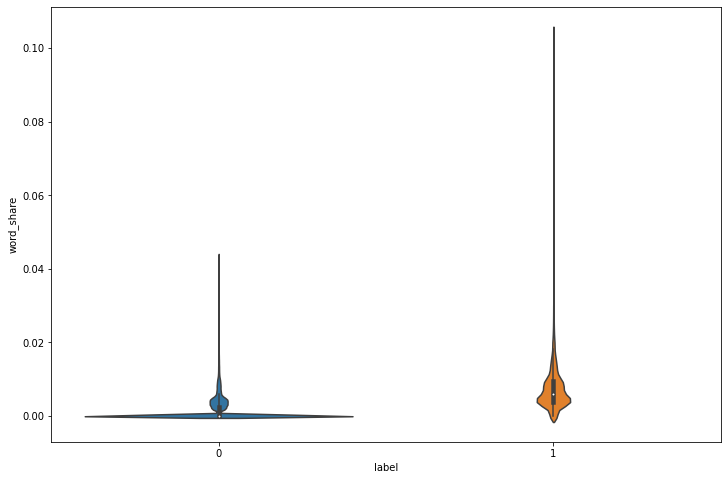

In [39]:
plt.figure(figsize=(12,8))
sns.violinplot(x='label', y='word_share', data=newtrain)
plt.show()

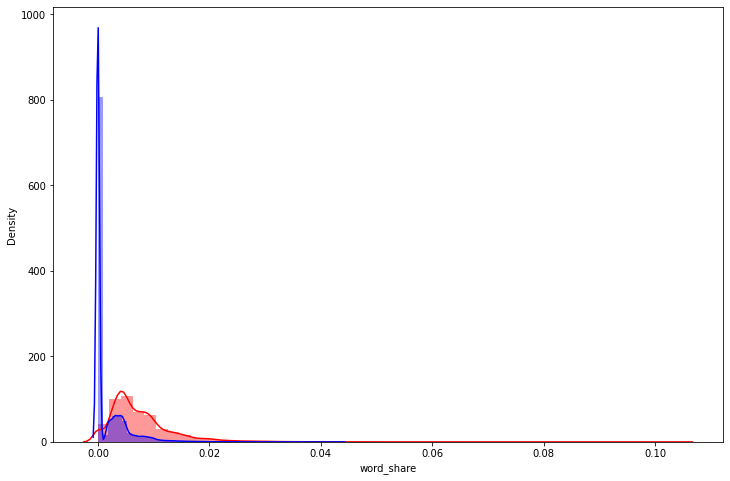

In [40]:
plt.figure(figsize=(12,8))
sns.distplot(newtrain[newtrain.label==1]['word_share'], label='1', color='red')
sns.distplot(newtrain[newtrain.label==0]['word_share'], label='0', color='blue')
plt.show()

From the above distplot, we can see that in the case of label=1, the distribution for the shared words is high, i.e. the value goes till 0.10 and so they can be considered as similar title and articles, whereas, in the blue distplot where label=0, the distribution is low, i.e the value reaches till 0.04. This alone is enough for us to differentiate the 2 classes.

## EDA: Feature word_Common

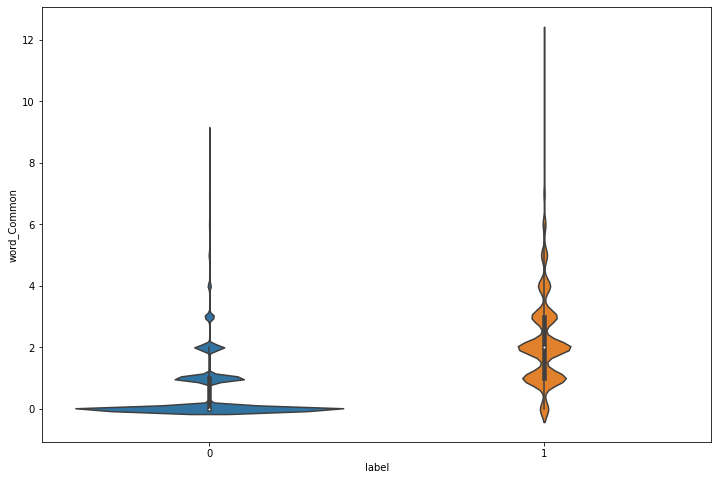

In [41]:
plt.figure(figsize=(12,8))
sns.violinplot(x='label',y='word_Common', data=newtrain)
plt.show()

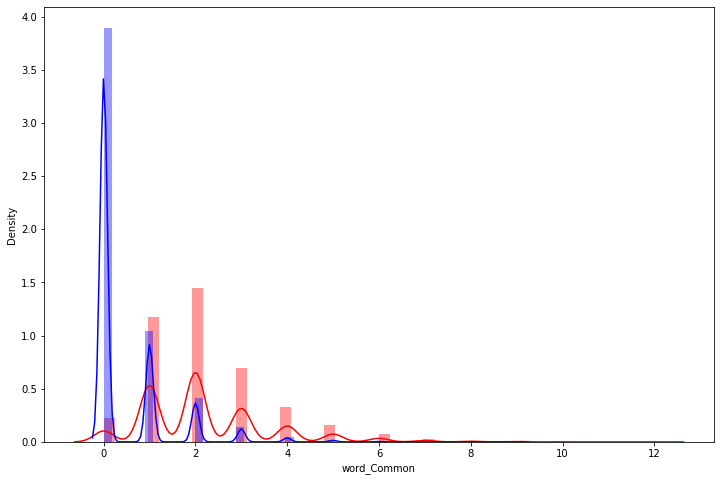

In [42]:
plt.figure(figsize=(12,8))
sns.distplot(newtrain[newtrain.label==1]['word_Common'], label='1', color='red')
sns.distplot(newtrain[newtrain.label==0]['word_Common'], label='0', color='blue')
plt.show()

Here the distributions of the word_Common feature in similar and non-similar title-article pairs are highly overlapping and so we cant comment much on this.

## EDA: Feature freq_tit+art

[]

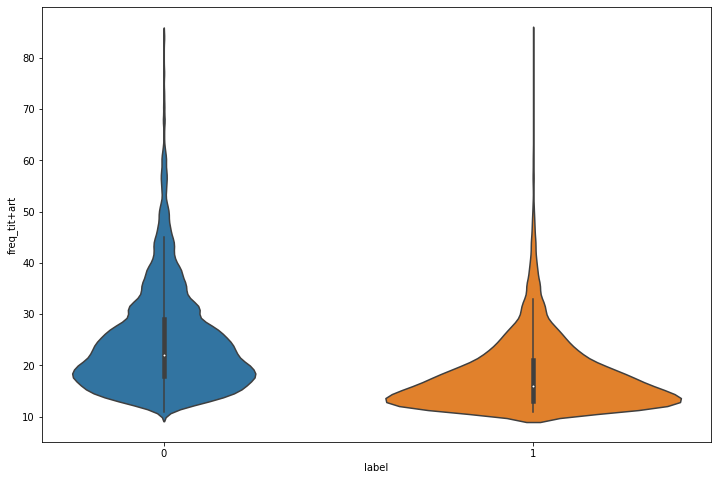

In [43]:
plt.figure(figsize=(12,8))
sns.violinplot(x='label',y='freq_tit+art', data=newtrain)
plt.plot()

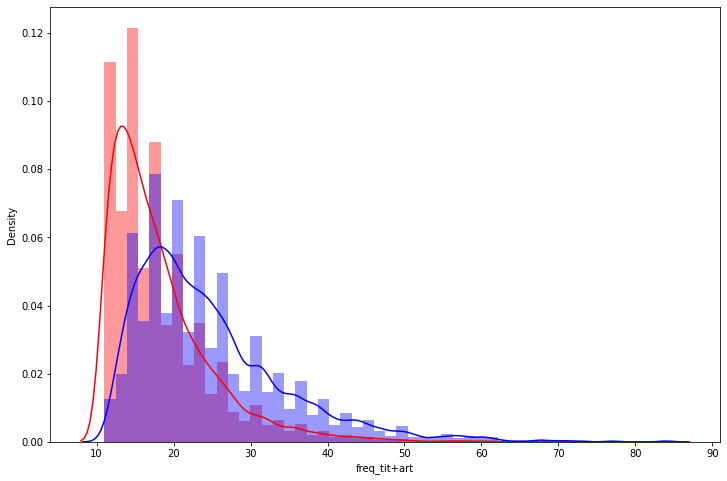

In [44]:
plt.figure(figsize=(12,8))
sns.distplot(newtrain[newtrain.label==1]['freq_tit+art'], label='1', color='red')
sns.distplot(newtrain[newtrain.label==0]['freq_tit+art'], label='0', color='blue')
plt.show()

From the above, since there is a huge overlap between the 2 distributions, we cant come to any conclusion.

# Fitting random forest model with above data

In [48]:
# Preparing data for model 1:
mod1data= newtrain.drop(['title_id','ans_id','ansdoc','tidoc'], axis=1)

In [49]:
# Separating the independent and dependent variables
x= mod1data.drop('label',axis=1).values
y=mod1data.label.values

In [50]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3)

In [51]:
# importing Randomforest classifier and RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [54]:
# Initializing the model
rf= RandomForestClassifier()
rf.fit(xtr,ytr)

RandomForestClassifier()

In [55]:
# prediction on the test data
mod1pred= rf.predict(xte)

In [58]:
# importing metrics for classification
from sklearn.metrics import confusion_matrix, normalized_mutual_info_score
from sklearn.metrics.classification import accuracy_score, log_loss

In [59]:
# Checking the confusion matrix
confusion_matrix(yte, mod1pred)

array([[37245,   653],
       [ 1440,  2758]], dtype=int64)

In [60]:
# Since the dataset is imbalanced, accuracy is generally not a good metric for model evaluation. Nonetheless, we can see the score below.
accuracy_score(yte, mod1pred)

0.9502803116685671

In [61]:
# calculating the log loss
log_loss(yte, mod1pred)

1.7172696011894242

In [54]:
# Saving the newly developed features into a csv file. 
newtrain.to_csv("newtrain_wo_preprocessing.csv", index=False)

# Preprocessing and feature engineering

In [45]:
# Importing stopwords: These are the words which don't contain any semantic meaning, such as I, me, you, etc and so it is safe to remove such words from our documents.
from nltk.corpus import stopwords

In [46]:
STOP_WORDS=stopwords.words('english')

In [47]:
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import distance

In [63]:
# writing a function to preprocess data.
def preprocess(x):
    # converting to string and lowercase
    x=str(x).lower()
    # replacing some short forms to original
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'").replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not").replace("n't", " not").replace("what's", "what is").replace("it's", "it is").replace("'ve", " have").replace("i'm", "i am").replace("'re", " are").replace("he's", "he is").replace("she's", "she is").replace("'s", " own").replace("%", " percent ").replace("$", " dollar ").replace("€", " euro ").replace("'ll", " will")
    # Initializing porter stemmer: Stemming is the process of replacing the words to their original form. Eg: the word 'agreed' has the original form as 'agree'.
    porter = PorterStemmer()
    # Matches any character which is not a word character. This includes the numbers as well.
    pattern = re.compile('\W')
    # if the type of the character x is str
    if type(x) == type(''):
        # Substitute the pattern with space in x
        x = re.sub(pattern, ' ', x)
        # Perform stemming in the string x
        x = porter.stem(x)
        # removing the html tags
        final = BeautifulSoup(x)
        x = final.get_text()
    return x

In [64]:
# importing fuzzywuzzy library to create some fuzzy features
from fuzzywuzzy import fuzz

In [68]:
# Token: It is a sentence separated by space
def get_token_features(article, title):
    token_features = [0.0]*10
    
    # Converting the sentence into tokens: 
    article_tokens = article.split()
    title_tokens = title.split()

    if len(article_tokens) == 0 or len(title_tokens) == 0:
        return token_features
    # Get the non-stopwords in the articles and titles
    article_words = set([word for word in article_tokens if word not in STOP_WORDS])
    title_words = set([word for word in title_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in the articles and titles
    article_stops = set([word for word in article_tokens if word in STOP_WORDS])
    title_stops = set([word for word in title_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from the article-title pair
    common_word_count = len(article_words.intersection(title_words))
    
    # Get the common stopwords from the article-title pair
    common_stop_count = len(article_stops.intersection(title_stops))
    
    # Get the common Tokens from the article-title pair
    common_token_count = len(set(article_tokens).intersection(set(title_tokens)))
    # calculating the common word count / min of the lengths of article and title words (mostly length of title since titles are naturally shorter than articles)
    token_features[0] = common_word_count / (min(len(article_words), len(title_words)) + SAFE_DIV)
     # calculating the common word count / max of the lengths of article and title words (mostly length of article since articles are naturally longer than titles)
    token_features[1] = common_word_count / (max(len(article_words), len(title_words)) + SAFE_DIV)
     # calculating the common stop word count / min of the lengths of stop words of article and title words
    token_features[2] = common_stop_count / (min(len(article_stops), len(title_stops)) + SAFE_DIV)
    # calculating the common stop word count / max of the lengths of stop words of article and title words
    token_features[3] = common_stop_count / (max(len(article_stops), len(title_stops)) + SAFE_DIV)
    # calculating the common token count / min of the lengths of tokens of article and title words
    token_features[4] = common_token_count / (min(len(article_tokens), len(title_tokens)) + SAFE_DIV)
    # calculating the common token count / max of the lengths of tokens of article and title words
    token_features[5] = common_token_count / (max(len(article_tokens), len(title_tokens)) + SAFE_DIV)
    
    # Last word of both article and title is same or not
    token_features[6] = int(article_tokens[-1] == title_tokens[-1])
    
    # First word of both article and title is same or not
    token_features[7] = int(article_tokens[0] == title_tokens[0])
    
    # Absolute difference in the length of article tokens and title tokens
    token_features[8] = abs(len(article_tokens) - len(title_tokens))
    
    #Average token length of both article and title
    token_features[9] = (len(article_tokens) + len(title_tokens))/2
    return token_features

# get the longest common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["ansdoc"] = df["ansdoc"].fillna("").apply(preprocess)
    df["tidoc"] = df["tidoc"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["ansdoc"], x["tidoc"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features: given 2 sentences, we can check what is the similarity between them.

    print("fuzzy features..")
    
    # token set ratio: Here we tokenize the string in question, sort the tokens alphabetically and take intersection of words in both strings, then take intersection + words in str1, then take intersection + words in str2 then finally compute fuzz ratio of all 3 combinations, the  one with maximum value will be the token set ratio.
    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["ansdoc"], x["tidoc"]), axis=1)
    # token sort ratio: Here we tokenize the string in question, sort the tokens alphabetically and then join them back into a string.
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["ansdoc"], x["tidoc"]), axis=1)
    # fuzz ratio: the number of edits one has to do in 1 sentence so that the 2 sentences are exactly equal, is measured by fuzz ratio.
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["ansdoc"], x["tidoc"]), axis=1)
    # fuzz partial ratio: If there are 2 strings that mean the same but one is a bit shorted out, fuzz ratio will say they are very different, but in reality they are not. So we calculate fuzz partial ratio and give a score based on the partial match.
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["ansdoc"], x["tidoc"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["ansdoc"], x["tidoc"]), axis=1)
    return df

In [60]:
# get value upto 4 point decimal
SAFE_DIV = 0.0001

In [69]:
# Creating features
newtrain=extract_features(newtrain)

token features...
fuzzy features..


In [70]:
newtrain

,title_id,ans_id,label,ansdoc,tidoc,freq_tit,freq_art,artlen,titlen,art_n_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,title03431,doc64538,0,r r tolkien own fantasy novel the lord of...,bhurishrava,10,22,9230,12,1567,...,0.000000,0,0,1616,809.0,0,0,0,18,0.250000
0,title03431,doc57586,0,the author of few lyrical works he was forem...,bhurishrava,10,22,9194,12,1425,...,0.000000,0,0,1458,730.0,0,0,0,18,0.250000
0,title03431,doc75237,0,zaynab delivered a defiant sermon in the cour...,bhurishrava,10,15,3868,12,676,...,0.000000,0,0,698,350.0,1,0,1,27,0.250000
0,title03431,doc13631,0,1400 1485 was secretary to richard iii of ...,bhurishrava,10,22,2290,12,386,...,0.000000,0,0,401,201.5,1,1,1,27,0.250000
0,title03431,doc92492,0,jayanegara was the heir crown prince the so...,bhurishrava,10,12,5325,12,806,...,0.000000,0,0,836,419.0,1,0,0,18,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14031,title89394,doc26116,0,keith known as bill keith born august 19 1...,majid jowhari,10,10,6465,13,1024,...,0.000000,0,0,1054,529.0,1,0,0,38,0.214286
14031,title89394,doc48527,1,he was elected in the 2015 federal election a...,majid jowhari,10,16,2891,13,431,...,0.004484,0,0,444,224.0,100,1,1,69,0.928571
14031,title89394,doc81169,0,a former journalist chan was a political ass...,majid jowhari,10,4,2283,13,366,...,0.000000,0,0,387,195.5,2,1,1,38,0.214286
14031,title89394,doc99060,0,he has served since 2003 except for the term ...,majid jowhari,10,13,7605,13,1186,...,0.000000,0,0,1262,633.0,1,0,0,38,0.214286


In [71]:
newtrain.to_csv("newtrain_preprocessed.csv", index=False)

In [69]:
newtrain= pd.read_csv("newtrain_preprocessed.csv")

In [71]:
newtrain.drop(['title_id','ans_id','ansdoc','tidoc'], axis=1, inplace=True)

In [72]:
x= newtrain.drop('label',axis=1).values
y=newtrain.label.values

In [73]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3)

# Creating random forest model

In [74]:
rf= RandomForestClassifier()

In [75]:
rf.fit(xtr,ytr)

RandomForestClassifier()

In [76]:
ypred= rf.predict(xte)

In [77]:
confusion_matrix(yte, ypred)

array([[37571,   370],
       [  788,  3367]], dtype=int64)

In [78]:
accuracy_score(yte,ypred)

0.9724914481185861

In [79]:
log_loss(yte,ypred)

0.9501187503885353

When comparing the above results from our previous model, these are much much better.

## Performing hyperparameter tuning

In [80]:
n_estimators=[int(x) for x in np.linspace(100,1200,12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,6)]
min_samples_split= [2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [81]:
param={
    'n_estimators':n_estimators,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}

In [ ]:
rf= RandomForestClassifier()
model=RandomizedSearchCV(rf,param_distributions=param,n_iter=10,n_jobs=1,verbose=2,cv=5,scoring='neg_mean_squared_error')
model.fit(xtr,ytr)

Since I had already run the above model, the best paramter can be checked using below:

model.best_params_

{'n_estimators': 500,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}


In [82]:
model= RandomForestClassifier(n_estimators=500,min_samples_split=15, min_samples_leaf=1, max_features='sqrt')

In [83]:
model.fit(xtr,ytr)

RandomForestClassifier(max_features='sqrt', min_samples_split=15,
                       n_estimators=500)

In [84]:
ypred2= model.predict(xte)

In [86]:
print('confusion matrix: ',confusion_matrix(yte, ypred2))
print('accuracy: ',accuracy_score(yte,ypred2))
print('log_loss: ',log_loss(yte,ypred))

confusion matrix:  [[37584   357]
 [  760  3395]]
accuracy:  0.9734654123907259
log_loss:  0.9501187503885353


In [93]:
#In order to get the probabilities
ypred3= model.predict_proba(xte)

## I have done the similar preprocessing for the test file, now I am importing it here

In [90]:
newtest= pd.read_csv('test_fuzzy.csv')

In [91]:
newtest_tit= list(newtest['title_id'])
newtestcandi=list(newtest['ans_id'])

In [92]:
newtest.drop(['title_id','ans_id','ansdoc','tidoc'], axis=1, inplace=True)

In [94]:
ypred=model.predict_proba(newtest)

In [95]:
# Selecting the probabilities of label 1 class
ypred= ypred[:,1]

In [96]:
len(ypred)

35080

In [97]:
# creating a dictionary in order to create a dataframe.
resd= {
    'title_id':newtest_tit,
    'ans_id':newtestcandi,
    'prob':ypred
}

In [98]:
# creating a dataframe from the dictionary
res= pd.DataFrame(resd)

In [99]:
# sorting the dataframe based on title_id, and grouping by the title_id so that we can arrange the candidates with highest probability as the first, next highest as the second and so on.
res= res.sort_values(['title_id', 'prob'], ascending=[True, False]).groupby('title_id', sort=False)['ans_id'].agg(list).reset_index()

In [101]:
res.head()

,title_id,ans_id
0,title00001,"[doc25038, doc72535, doc79267, doc29601, doc63..."
1,title00003,"[doc88056, doc53211, doc02049, doc46699, doc55..."
2,title00029,"[doc61850, doc82732, doc18886, doc35908, doc27..."
3,title00032,"[doc73280, doc47393, doc61833, doc18223, doc23..."
4,title00059,"[doc68916, doc40387, doc73853, doc72917, doc39..."


In [110]:
res.to_json('suggestion.json')

In [111]:
sample= pd.read_json('suggestion.json.sample')

In [112]:
sample

,title_id,candidates
0,title23754,"[doc28476, doc63775, doc29895, doc55899, doc24..."
1,title51594,"[doc40936, doc13974, doc48856, doc98766, doc99..."
2,title83742,"[doc80775, doc35710, doc35978, doc20069, doc66..."
3,title39549,"[doc58002, doc73999, doc25377, doc75093, doc06..."
4,title55066,"[doc06634, doc38143, doc50392, doc47497, doc82..."
...,...,...
3503,title44628,"[doc05667, doc81689, doc02202, doc36093, doc55..."
3504,title46615,"[doc94178, doc35719, doc13869, doc60664, doc35..."
3505,title70195,"[doc22482, doc92442, doc52667, doc31946, doc51..."
3506,title93852,"[doc10320, doc84229, doc73773, doc73630, doc36..."


In [114]:
readres=pd.read_json('suggestion.json',)

In [115]:
readres

,candidates
title00001,"[doc25038, doc72535, doc79267, doc40314, doc29..."
title00003,"[doc88056, doc02049, doc53211, doc55840, doc46..."
title00029,"[doc61850, doc82732, doc18886, doc35908, doc77..."
title00032,"[doc73280, doc06185, doc34201, doc33392, doc18..."
title00059,"[doc68916, doc72917, doc40387, doc07275, doc39..."
...,...
title99792,"[doc93914, doc95121, doc89654, doc00898, doc28..."
title99924,"[doc11987, doc62759, doc30539, doc76413, doc78..."
title99956,"[doc67667, doc61710, doc16544, doc94341, doc17..."
title99962,"[doc34210, doc21191, doc97773, doc61111, doc48..."


In [117]:
# saving to csv
res.to_csv('res.csv')

Finally, we come to the conclusion of this project. This project was a good practice of NLP, data preprocessing, creation of new features and fitting the right model for the job. I hope you like this project. Since it was an online coding problem, my model got a great score of 96% out of 100.

In the MLP.ipynb file I train an MLP to achieve the same task. Since this was a coding test question, I didn't get a chance to test out the model evaluation score. Nonetheless, it is nice to have different approaches to the same problem.